<a alt="grabcut" href="https://machinelearningflashcards.com">
    <img src="/images/machine_learning_flashcards/Grabcut_print.png" class="flashcard center-block">
</a>

## Preliminaries

In [1]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Load Image

In [2]:
# Load image
image_bgr = cv2.imread('images/plane_256x256.jpg')

## Convert To RGB

In [3]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

## Draw Rectangle Around Foreground

In [4]:
# Rectange values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

## Apply GrabCut

In [5]:
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

## Show image

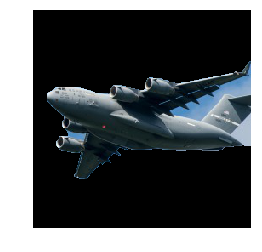

In [6]:
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()